### Understanding K-Means Clustering Algorithm

In [2]:
# Objective: Given output of data, the algorithm finds clusters
# 1) Choose the number K of clusters desired
# 2) Randomly select K points to be centroids
#    (not necessarily in dataset)
# 3) Assign each data point to the closest centroid
# 4) Re-calculate the centroid of each cluster
# 5) Re-assign each data point to its closest centroid.
#    If any re-assignment took place, repeat step 4. 
#    Otherwise, you are done.

# Random Initialization Trap
# Initially selecting the centroids improperly may dictate
# the outcome of the algorithm
# To avoid this, we can use the K-Means++ algorithm

# Choosing the right number:
# We introduce the WCSS metric
# WCSS = Within Cluster Sum of Squares
# For a given cluster, sum up the squared distances from each 
# data point to th cluster's centroid
# WCSS = the sum of all these sums over each cluster
# WCSS decreases as the number of clusters increases
# Plot the WCSS vs. Clusters 
# The Elbow Method - Find the "elbow" in the chart and
# that is the optimal number of clusters

### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [5]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = dataset.iloc[:, [3, 4]].values 
# Customer ID is irrelevant here
# For the sake of simplicity of visualization, 
# we will eliminate Gender
# There is no apriori dependent variable in the case of 
# clustering
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Using the Elbow Method to find the optimal number of clusters

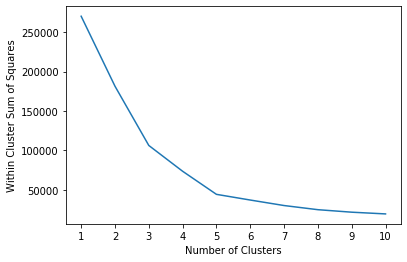

In [16]:
from sklearn.cluster import KMeans
# Now run the K-Means algorithm with 1-10 clusters
# Then use the Elbow Method to find the optimal number 
# of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    random_state=0, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.xticks(range(1, 11))
plt.show()

# It appears the elbow is at Number of Clusters = 5

### Training the K-Means Model on the Dataset

In [18]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [19]:
print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


### Visualizing the clusters

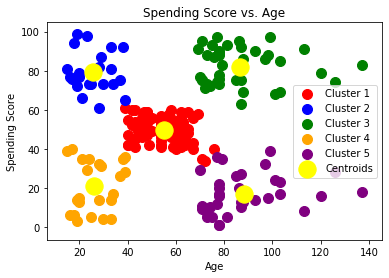

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="orange", label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="purple", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending Score vs. Age")
plt.legend()
plt.show()